# 5 - XGBoost Model Training Notebook 

In [1]:
import sys  
sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/src')
import pandas as pd
import misc

%load_ext autoreload
%autoreload 2

Load the data

In [5]:
df = misc.load_processed_dataset("aapl", "2018-01-01", "2023-01-1")

Feature selection

In [6]:
features = ['Open', 'High', 'Low', 'Close', 'Close Forecast', 'Volume', 'Dividends', 'Stock Splits',
        'SMA_10', 'SMA_20', 'SMA_50', 'EMA_10', 'EMA_20',
        'EMA_50', 'RSI_14', 'upper_band', 'middle_band', 'lower_band', 'macd',
        'macdsignal', 'macdhist', 'OBV', 'ADX', 'AD', 'Aroon_down', 'Aroon_up',
        'SlowK', 'SlowD', 'Williams %R', 'pct_change', 'dayofweek', 'quarter',
        'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'S&P Close'
    ]
df = df[features]

Dataset splitting

In [7]:
X_train, X_test, Y_train, Y_test = misc.create_train_test_set(df, 0.8, verbose=False)

Model definition

[0]	validation_0-rmse:89.98871	validation_1-rmse:151.78564
[100]	validation_0-rmse:33.42142	validation_1-rmse:58.71665


/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:42:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1705650237050/work/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:12.50360	validation_1-rmse:25.43730
[300]	validation_0-rmse:4.84229	validation_1-rmse:12.70571
[400]	validation_0-rmse:2.20800	validation_1-rmse:8.54903
[500]	validation_0-rmse:1.45754	validation_1-rmse:7.20613
[600]	validation_0-rmse:1.26283	validation_1-rmse:6.76459
[700]	validation_0-rmse:1.18577	validation_1-rmse:6.62319
[800]	validation_0-rmse:1.14578	validation_1-rmse:6.52851
[900]	validation_0-rmse:1.11957	validation_1-rmse:6.51003
[999]	validation_0-rmse:1.09349	validation_1-rmse:6.51272


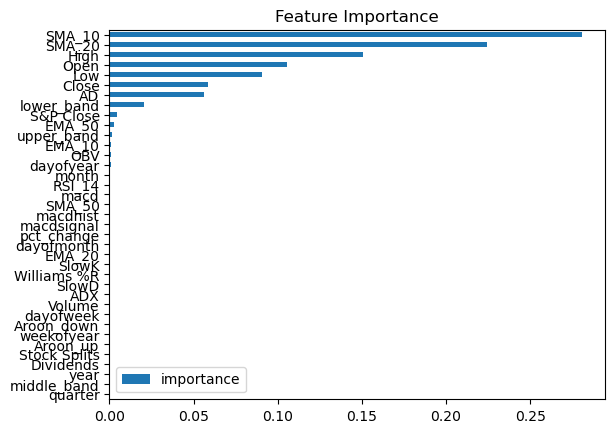

In [10]:
import matplotlib.pyplot as plt
import xgboost as xgb

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                n_estimators=1000,
                early_stopping_rounds=50,
                objective='reg:linear',
                max_depth=3,
                learning_rate=0.01)
reg.fit(X_train, Y_train,
        eval_set=[(X_train, Y_train), (X_test, Y_test)],
        verbose=100)

# Feature importance
fi = pd.DataFrame(data=reg.feature_importances_,
        index=reg.feature_names_in_,
        columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

preds = reg.predict(X_test)
preds = pd.Series(preds, index=Y_test.index)

Visualisation

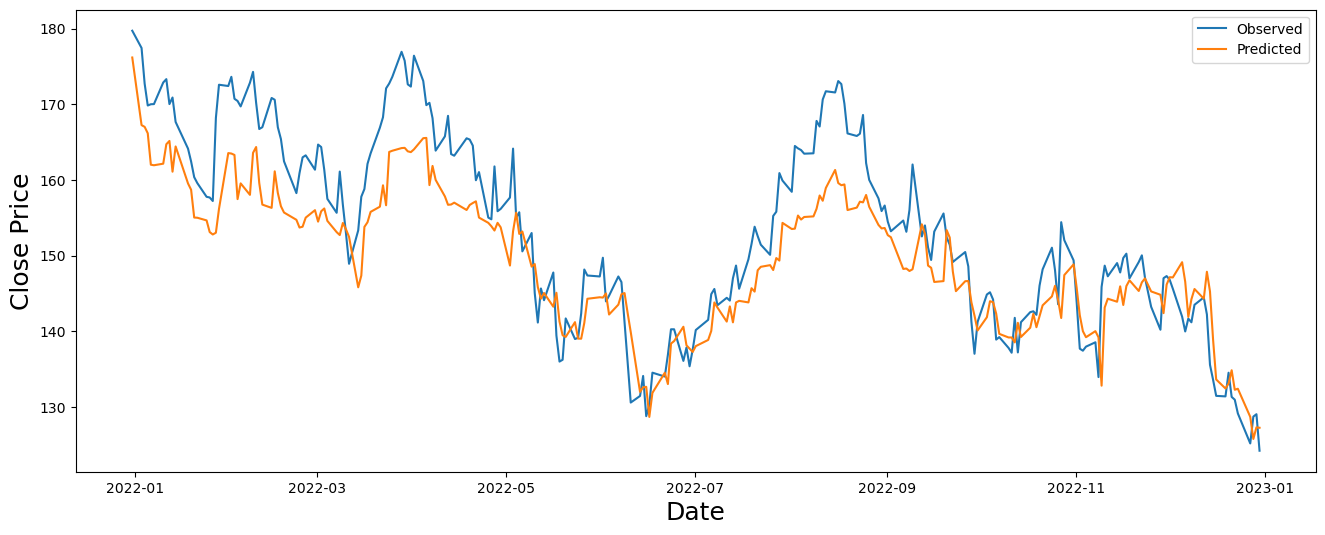

In [11]:
misc.plot(preds, Y_test)

Evaluate

In [12]:
misc.evaluate(preds, Y_test, verbose=True)

R^2: 0.7433210993988408
MSE: 42.30618942765443
RMSE: 6.504320827546442
MAE: 5.293855697389633
MAPE: 3.341938688119419


(0.7433210993988408,
 42.30618942765443,
 6.504320827546442,
 5.293855697389633,
 3.341938688119419)